In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Preprocessing of data

df = pd.read_csv("mcdonalds.csv")


segmentation_vars = df.columns[:11]
MD_x = df[segmentation_vars].applymap(lambda x: 1 if x == "Yes" else 0)


print(MD_x.mean().round(2))


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


C:\Users\nehap\AppData\Local\Temp\ipykernel_19592\765719035.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  MD_x = df[segmentation_vars].applymap(lambda x: 1 if x == "Yes" else 0)


           0
0   0.299447
1   0.492244
2   0.625290
3   0.708386
4   0.767866
5   0.818166
6   0.862015
7   0.901563
8   0.938323
9   0.970677
10  1.000000


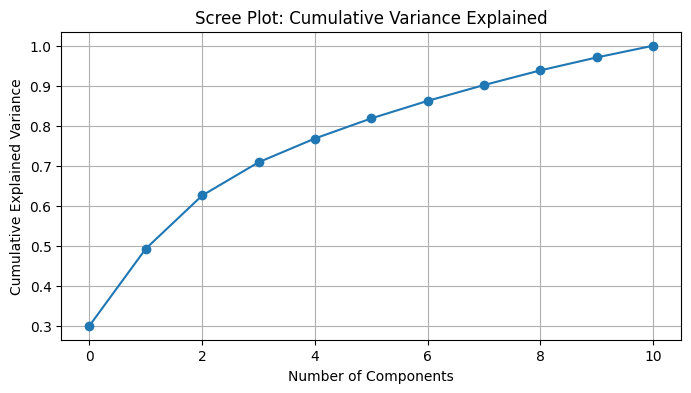

In [ ]:

pca = PCA()
MD_pca = pca.fit(MD_x)


print(pd.DataFrame(pca.explained_variance_ratio_).cumsum())


plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Scree Plot: Cumulative Variance Explained")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()


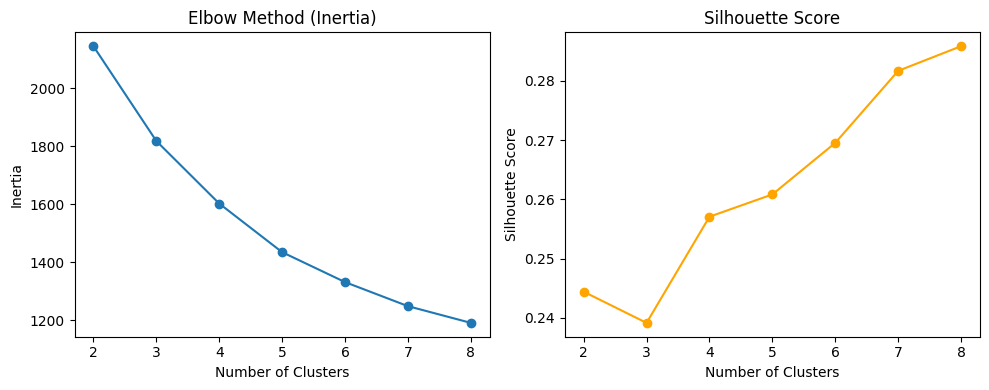

In [ ]:
# Test k-means for k=2 to k=8
inertia = []
silhouette = []

for k in range(2, 9):
    km = KMeans(n_clusters=k, n_init=10, random_state=1234)
    labels = km.fit_predict(MD_x)
    inertia.append(km.inertia_)
    silhouette.append(silhouette_score(MD_x, labels))


plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(range(2, 9), inertia, marker='o')
plt.title("Elbow Method (Inertia)")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(range(2, 9), silhouette, marker='o', color='orange')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()


Segment
2    533
0    364
3    316
1    240
Name: count, dtype: int64


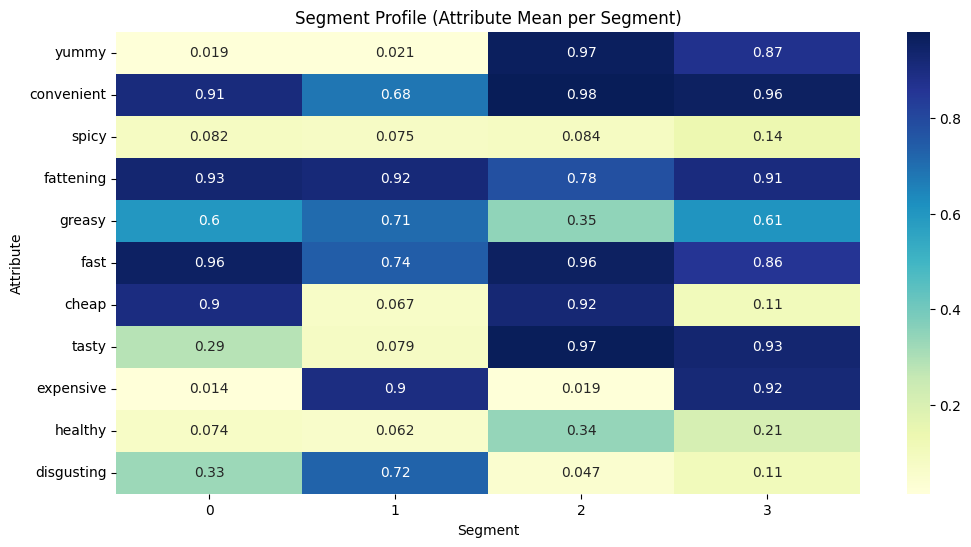

In [ ]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
df['Segment'] = kmeans.fit_predict(MD_x)

print(df['Segment'].value_counts())


profile = MD_x.copy()
profile['Segment'] = df['Segment']
profile_means = profile.groupby('Segment').mean()

plt.figure(figsize=(12, 6))
sns.heatmap(profile_means.T, cmap="YlGnBu", annot=True)
plt.title("Segment Profile (Attribute Mean per Segment)")
plt.xlabel("Segment")
plt.ylabel("Attribute")
plt.show()


In [ ]:

like_mapping = {
    "I hate it!-5": -5, "-4": -4, "-3": -3, "-2": -2, "-1": -1,
    "0": 0, "+1": 1, "+2": 2, "+3": 3, "+4": 4, "I love it!+5": 5
}
df['Like.n'] = df['Like'].map(like_mapping)


segment_means = df.groupby('Segment').agg({
    'Like.n': 'mean',
    'VisitFrequency': lambda x: x.mode()[0] if not x.mode().empty else np.nan,
    'Gender': lambda x: (x == "Female").mean()
}).rename(columns={'Gender': 'Female_%'})

print(segment_means)


           Like.n VisitFrequency  Female_%
Segment                                   
0       -1.175824    Once a year  0.585165
1       -2.670833    Once a year  0.420833
2        2.834897   Once a month  0.607880
3        2.174051   Once a month  0.474684
